In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os
from repast4py import parameters

params = parameters.init_params("model1.yaml", "")

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: PlannerPropMax1
Current folders are:
PlannerPropMax1.0
PlannerPropMax1.1
PlannerPropMax1.2
PlannerPropMax1.3


In [3]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [4]:
#names=["inv goods bought", "inv goods inventories", "grossInvestments","grossInvExpected"]
names= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    names[i] = "inv goods bought type "+str(params['investmentGoods'][i])

names.append("inv goods inventories")
names.append("grossInvestments")
names.append("grossInvExpected")

In [5]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

In [6]:
plannerInfo

,inv goods bought type 2,inv goods bought type 4,inv goods bought type 6,inv goods bought type 8,inv goods inventories,grossInvestments,grossInvExpected
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,1220.960788,400.329644,0.000000,0.000000,1824.919444,0.000000,0.000000e+00
3,2722.031523,4392.135961,0.000000,0.000000,8151.535957,0.000000,0.000000e+00
4,4719.944738,6491.770613,1681.694776,0.000000,14686.100417,0.000000,0.000000e+00
...,...,...,...,...,...,...,...
259,10801.304224,15633.365260,11238.358957,33073.485664,81654.943893,26614.732513,4.159295e+06
260,10886.652616,15944.717541,20305.010913,18273.222164,74858.140898,25114.882595,4.185509e+06
261,12457.983993,15924.411522,12404.026308,12218.920857,59956.850165,25503.602866,4.155945e+06
262,10736.032928,16244.050661,13433.620618,10512.702951,58697.357485,28932.682153,4.149882e+06


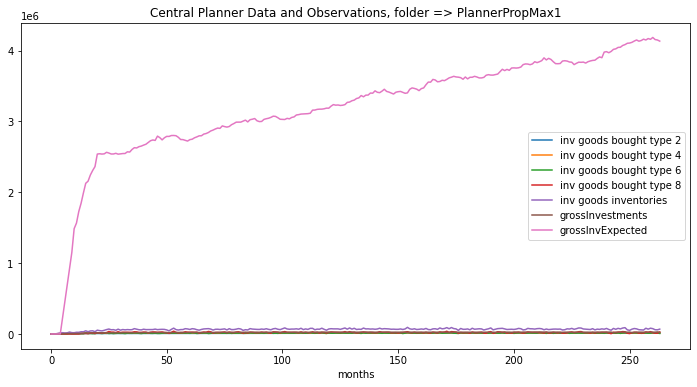

In [7]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


['inv goods bought type 2', 'inv goods bought type 4', 'inv goods bought type 6', 'inv goods bought type 8']


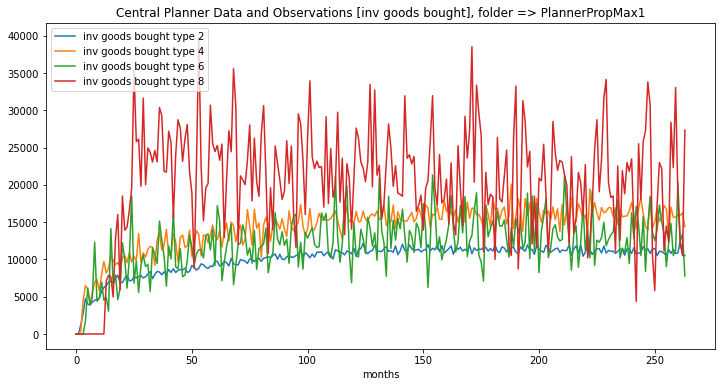

In [8]:
namesInvGoods= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    namesInvGoods[i] = "inv goods bought type "+str(params['investmentGoods'][i])
print(namesInvGoods)
    
fig=plannerInfo[namesInvGoods].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

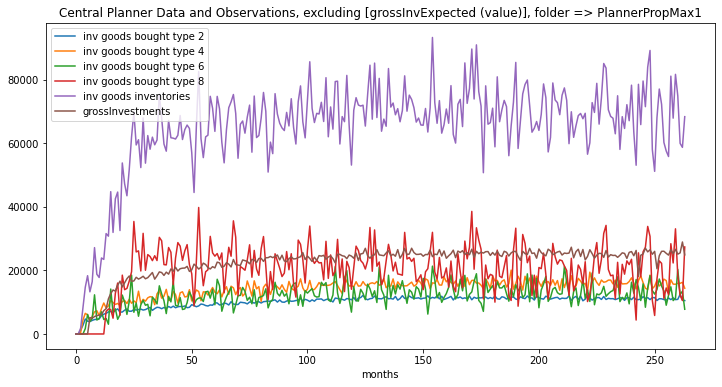

In [9]:
fig=plannerInfo[names[:-1]].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotAllButExpectedInv.jpg",dpi=180)